In [14]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [19]:
heat_trainner = pd.read_csv("C:/Users/fadic/gitproject/data/heat_trainer.csv")
# printing the first 5 rows of dataset
heat_trainner.head()

,StudyID,A_Date,Diagnosis__Admitting,DX1,DX2,DX3,DX4,Disposition_Status,heat_group,heat_syn_cramps,...,POSITION,ADMITTING_heat,LOS,AGE_GROUP,heat_stroke,RHABDO,AGE_4_GROUP,AGE_6_GROUP,LOS_3_GROUP,STATE
0,CH000357,1/27/2016,NaN,M6282,E8342,R748,Z87891,1,5.0,NaN,...,1,7,2,1,0,1,1,2,2,19
1,CH006327,6/3/2015,NaN,486,7904,2768,27652,1,NaN,NaN,...,2,7,3,3,0,0,4,5,4,19
2,CH003029,5/14/2016,NaN,M6282,N179,E860,R740,1,5.0,NaN,...,1,7,2,1,0,1,1,1,4,19
3,CH002437,9/17/2014,NaN,25541,2761,2767,4589,1,NaN,NaN,...,1,7,2,2,0,0,3,4,3,19
4,CH006972,1/20/2016,NaN,M6282,N179,N141,T50995A,1,5.0,NaN,...,2,7,2,3,0,1,3,4,4,19


In [20]:
#find total observations in dataset
len(heat_trainner.index)

7255

In [21]:
# getting the columns of the dataset
columns = list(heat_trainner.columns)
columns

['StudyID',
 'A_Date',
 'Diagnosis__Admitting',
 'DX1',
 'DX2',
 'DX3',
 'DX4',
 'Disposition_Status',
 'heat_group',
 'heat_syn_cramps',
 'heat_exh',
 'heat_other',
 'HYPONATREMIA',
 'FY',
 'SEX',
 'BRANCH',
 'RACE_CODE',
 'POSITION',
 'ADMITTING_heat',
 'LOS',
 'AGE_GROUP',
 'heat_stroke',
 'RHABDO',
 'AGE_4_GROUP',
 'AGE_6_GROUP',
 'LOS_3_GROUP',
 'STATE']

In [24]:
#Check data with info function
heat_trainner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7255 entries, 0 to 7254
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   StudyID               7255 non-null   object 
 1   A_Date                7255 non-null   object 
 2   Diagnosis__Admitting  1660 non-null   object 
 3   DX1                   7255 non-null   object 
 4   DX2                   6721 non-null   object 
 5   DX3                   5710 non-null   object 
 6   DX4                   4587 non-null   object 
 7   Disposition_Status    7255 non-null   int64  
 8   heat_group            2118 non-null   float64
 9   heat_syn_cramps       133 non-null    float64
 10  heat_exh              430 non-null    float64
 11  heat_other            489 non-null    float64
 12  HYPONATREMIA          1052 non-null   float64
 13  FY                    7255 non-null   int64  
 14  SEX                   7255 non-null   int64  
 15  BRANCH               

In [25]:
print("Heat Injuries : {}".format(heat_trainner.shape))

Heat Injuries : (7255, 27)


In [56]:
#this is based on the table from the logistic regression code displayed.
data=heat_trainner.drop(columns=['StudyID' , 'A_Date', 'heat_exh', 'heat_other', 'HYPONATREMIA' , 'AGE_6_GROUP', 'AGE_GROUP', 
                                 'heat_syn_cramps', 'LOS', 'Diagnosis__Admitting', 'DX1', 'DX2', 'DX3', 'DX4', 'heat_group', 
                                 'ADMITTING_heat','FY','heat_stroke','LOS_3_GROUP', 'Disposition_Status'])

In [57]:
data.isnull().sum()
data.isna().sum()

SEX            0
BRANCH         0
RACE_CODE      0
POSITION       0
RHABDO         0
AGE_4_GROUP    0
STATE          0
dtype: int64

In [67]:
data['STATE'].value_counts()

1     1005
2      921
3      852
4      732
23     543
5      392
6      380
7      374
8      305
9      296
10     248
11     221
12     211
13     197
14     114
15      96
16      96
17      92
18      66
19      47
20      33
21      28
22       6
Name: STATE, dtype: int64

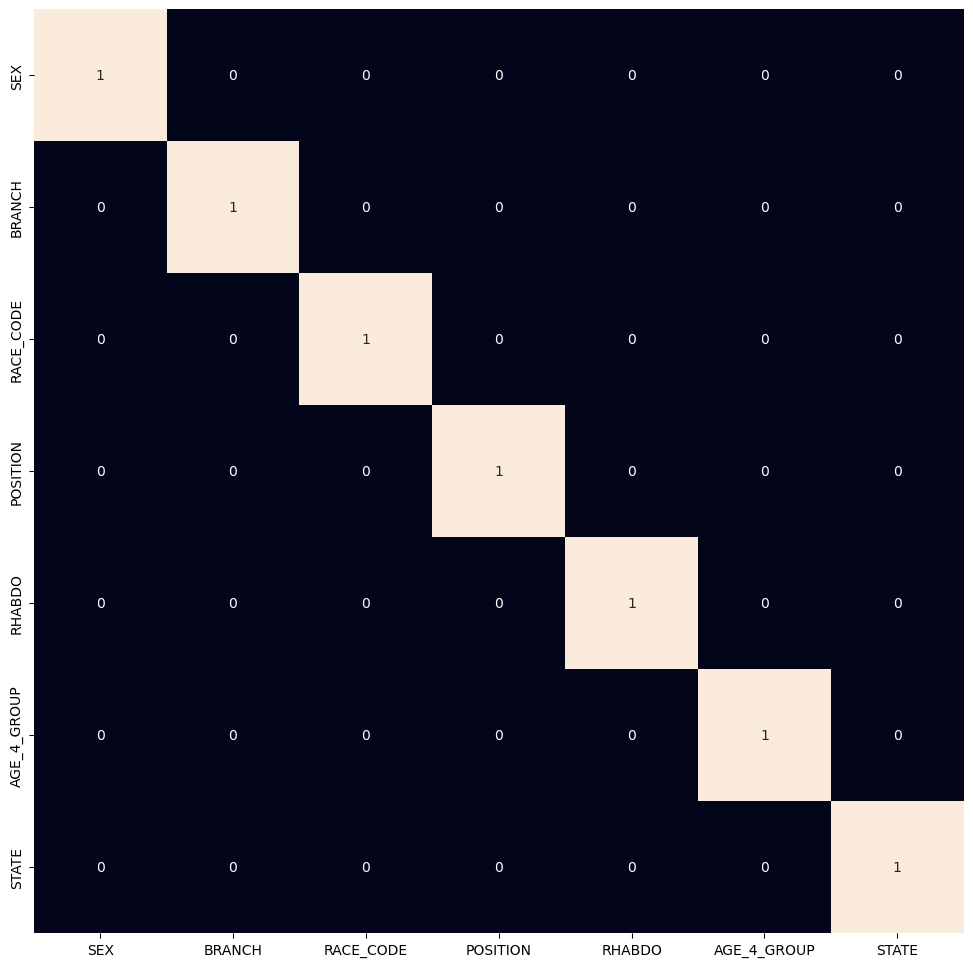

In [59]:
plt.figure(figsize=(12, 12))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [60]:


data
x_train = data.iloc[:,:-1]
y_train = data.RHABDO

x_test = data.iloc[:,:-1]
y_test = data.RHABDO
#X = data.iloc[:, 1:5].values
#Y = data.iloc[:, 5].values

In [61]:
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [62]:
models = LogisticRegression()


models.fit(x_train, y_train)

print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(y_train, models.predict(x_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(
y_test, models.predict(x_test)))
print()


LogisticRegression() : 
Training Accuracy :  1.0
Validation Accuracy :  1.0



In [63]:
print(metrics.classification_report(y_test,models.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4212
           1       1.00      1.00      1.00      3043

    accuracy                           1.00      7255
   macro avg       1.00      1.00      1.00      7255
weighted avg       1.00      1.00      1.00      7255



In [64]:
import pickle
with open('file_heat.pkl','wb') as file:
    pickle.dump(models,file)

In [66]:
models.predict([[2, 3, 5, 4, 1, 2]])

array([1], dtype=int64)